In [1]:
# 딥러닝, 당뇨data
# from sklearn.datasets import load_diabetes
import tensorflow as tf

In [2]:
from tensorflow.keras import Sequential # 모델 객체
from tensorflow.keras.layers import Dense, Flatten, Dropout # 모델 레이어(층)
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [3]:
# data, target = load_diabetes(return_X_y=True, as_frame=True)
# type(data), type(target)

### 모델 생성

In [4]:
df = pd.read_csv('./diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# 데이터타입 확인
df.info()

# 고유값 확인
# for i in df.columns:
#     print(i)
#     print(df[i].unique())

# 결측치 확인
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0


<AxesSubplot:>

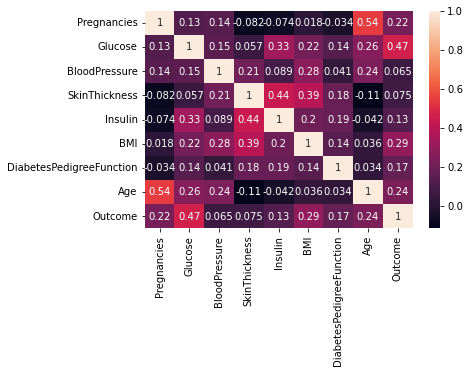

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)

In [8]:
data = df.iloc[:, :-1]
target = df['Outcome']

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler()
data = scaler.fit_transform(data)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                 random_state=42,
                                                 test_size=0.2)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 random_state=42,
                                                 test_size=0.2)

In [13]:
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:
X_train.shape

(491, 8)

### 모델 구상

- 첫번째 인자 = 출력 뉴런의 수.

- input_dim = 입력 뉴런의 수. (입력의 차원)

- activation = 활성화 함수.

    - linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력.
    
    - sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
    
    - softmax : 셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
    
    - relu : 은닉층에 주로 사용되는 활성화 함수.

In [15]:
model = Sequential(name='Diabetes')

In [16]:
model.add(Dense(100, activation='relu', input_shape=(8,)))

In [17]:
model.add(Dropout(0.5))

In [18]:
model.add(Dense(100, activation = 'relu'))

In [19]:
model.add(Dropout(0.3))

In [20]:
# 출력 Layer 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화함수
model.add(Dense(1, activation ='sigmoid'))

In [21]:
model.summary()

Model: "Diabetes"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               900       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,101
Trainable params: 11,101
Non-trainable params: 0
_________________________________________________________________


### 모델 생성

In [22]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics="accuracy")

### 모델 학습

In [23]:
result=model.fit(X_train,y_train,
                epochs=100,
                batch_size=5,
                validation_data=(X_val,y_val))

Epoch 1/100
99/99 [==============================] - 1s 3ms/step - loss: 0.6643 - accuracy: 0.6334 - val_loss: 0.6451 - val_accuracy: 0.6585
Epoch 2/100
99/99 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6640 - val_loss: 0.6266 - val_accuracy: 0.6504
Epoch 3/100
99/99 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.6823 - val_loss: 0.6172 - val_accuracy: 0.6667
Epoch 4/100
99/99 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.6802 - val_loss: 0.5931 - val_accuracy: 0.6585
Epoch 5/100
99/99 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.6578 - val_loss: 0.5851 - val_accuracy: 0.6748
Epoch 6/100
99/99 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.6945 - val_loss: 0.5666 - val_accuracy: 0.6585
Epoch 7/100
99/99 [==============================] - 0s 2ms/step - loss: 0.5564 - accuracy: 0.7128 - val_loss: 0.5469 - val_accuracy: 0.6748
Epoch 8/100
9

### 시각화

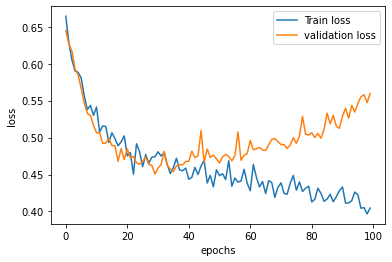

In [26]:
# loss 비교
plt.plot(result.epoch, result.history['loss'],label='Train loss')
plt.plot(result.epoch, result.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

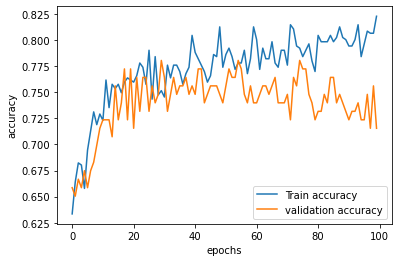

In [25]:
plt.plot(result.epoch, result.history['accuracy'],label='Train accuracy')
plt.plot(result.epoch, result.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()